In [106]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [122]:
mnist = tf.keras.datasets.mnist

In [123]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [124]:
X_train_full.shape

(60000, 28, 28)

In [125]:
y_train_full.shape

(60000,)

In [126]:
img_0 = X_train_full[0]


<AxesSubplot:>

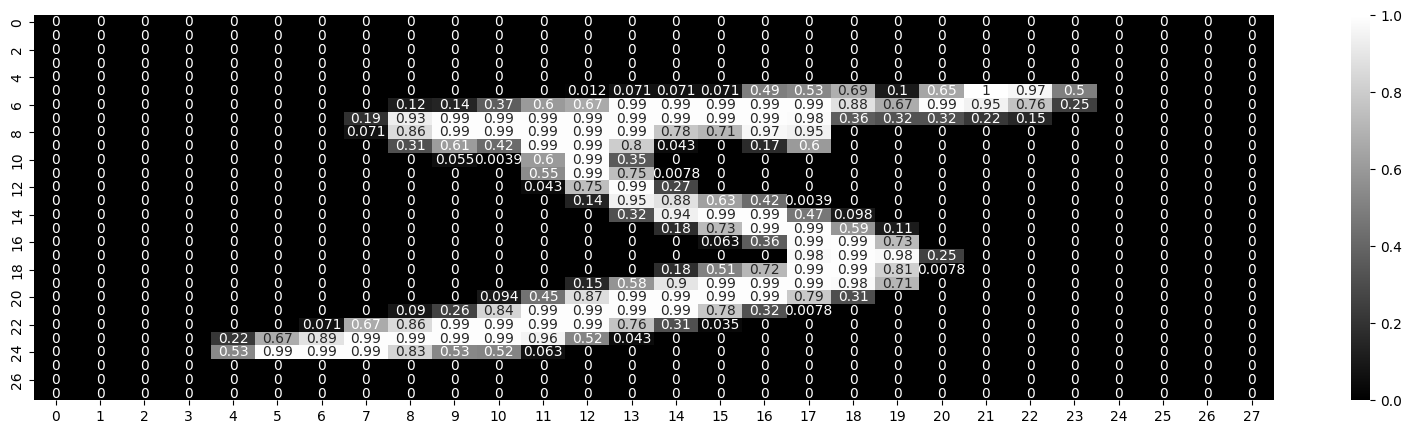

In [127]:
plt.figure(figsize=(20,5))
sns.heatmap(img_0/255,annot=True,cmap="gray")

In [128]:
X_valid ,X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [129]:
X_train_CNN = np.expand_dims(X_train,-1)
X_test_CNN = np.expand_dims(X_test,-1)
X_valid_CNN = np.expand_dims(X_valid,-1)

In [130]:
X_train_CNN.shape

(55000, 28, 28, 1)

In [131]:
input_shape =(28,28,1) # (row,col,channels)
LAYERS= [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
    ]

In [132]:
CNN_model = tf.keras.Sequential(LAYERS)

In [133]:
CNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [134]:
(3*3*32+1)*64

18496

In [135]:
1600*10 + 10

16010

In [139]:
print("The no. of classes in y ",len(np.unique(y_test)))


The no. of classes in y  10


In [140]:
CNN_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

In [141]:
history = CNN_model.fit(X_train_CNN,y_train,epochs=10,batch_size=40,validation_data =(X_valid_CNN,y_valid))

Epoch 1/10
1375/1375 [==============================] - 6s 4ms/step - loss: 0.1741 - accuracy: 0.9489 - val_loss: 0.0617 - val_accuracy: 0.9810
Epoch 2/10
1375/1375 [==============================] - 6s 4ms/step - loss: 0.0561 - accuracy: 0.9824 - val_loss: 0.0476 - val_accuracy: 0.9874
Epoch 3/10
1375/1375 [==============================] - 6s 4ms/step - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0578 - val_accuracy: 0.9828
Epoch 4/10
1375/1375 [==============================] - 6s 4ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.0418 - val_accuracy: 0.9884
Epoch 5/10
1375/1375 [==============================] - 6s 4ms/step - loss: 0.0253 - accuracy: 0.9920 - val_loss: 0.0374 - val_accuracy: 0.9902
Epoch 6/10
1375/1375 [==============================] - 6s 4ms/step - loss: 0.0207 - accuracy: 0.9932 - val_loss: 0.0377 - val_accuracy: 0.9892
Epoch 7/10
1375/1375 [==============================] - 6s 4ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.0354 - val_accuracy:

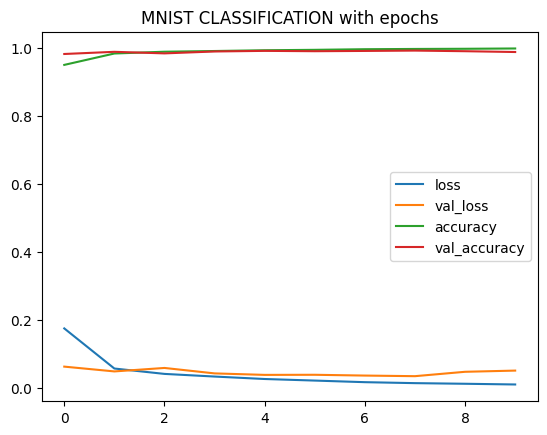

In [142]:
plt.title("MNIST CLASSIFICATION with epochs")
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [143]:
#performance on the test set
y_predict_cnn = CNN_model.predict(X_test)
y_predict_cnn_one = np.argmax(y_predict_cnn,axis=1)

313/313 [==============================] - 1s 3ms/step


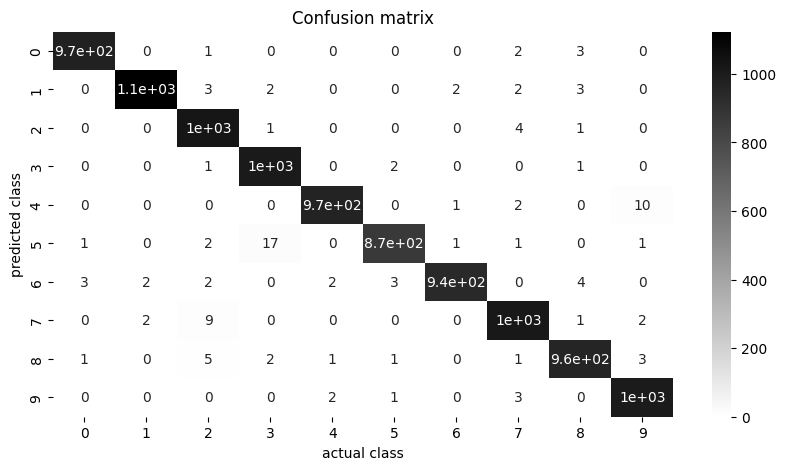

In [144]:
cm = confusion_matrix(y_test,y_predict_cnn_one)
plt.figure(figsize=(10,5))
plt.title("Confusion matrix")
sns.heatmap(cm,annot=True,cmap="binary")
plt.xlabel("actual class")
plt.ylabel("predicted class")
plt.show()

In [149]:
#evaluating the model
CNN_model.evaluate(X_test_CNN,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0399 - accuracy: 0.9886


[0.03990578278899193, 0.9886000156402588]

In [65]:
#saving the model
tf.keras.models.save_model(CNN_model,'CNN_model.h5')

####  Tranfer learning for determining even and odd 
    1.loading the CNN model trained for recognizing the digit from 0-9
    2.Adding one layer at the top with 2 neurons to classify even and odd
    3.Setting the Trainable parameters to false for all layers except the last one 
    4.changing the y labels for y test ytrain y valid to be b/w 0-1 for odd and even respectively
    5.Training again for last layers weights
    5.Confustion matrix and evaluation 

In [161]:
#loading the CNN model
old_cnn_model = tf.keras.models.load_model('CNN_model.h5')

In [162]:
#layers in the network 
old_cnn_model.layers

In [152]:
for layer in old_cnn_model.layers:
    print(layer,"is trainable::", layer.trainable)

<keras.layers.convolutional.conv2d.Conv2D object at 0x000002329DA31508> is trainable:: True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000232C7C5A0C8> is trainable:: True
<keras.layers.convolutional.conv2d.Conv2D object at 0x00000232C7C5A588> is trainable:: True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002320E9DB688> is trainable:: True
<keras.layers.reshaping.flatten.Flatten object at 0x000002329DA1A3C8> is trainable:: True
<keras.layers.core.dense.Dense object at 0x000002329DA31188> is trainable:: True


#### all layers are set to trainable parameter to True by default 

In [163]:
#we have to add one more layer in this model to determine even and odd
old_cnn_model.add(tf.keras.layers.Dense(2,activation="softmax"))

In [164]:
old_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

#### Here we see that Trainable parameters are 34848 thats including the all layers we can keep the weights of other layers same except the last one  

In [165]:
#fixing the trainable weights setting trainable to false except last layer
def set_trainable_weight_false(model):
    for layer in model.layers[:-1]:
        layer.trainable = False
    return model

In [166]:
tranf_cnn_model = set_trainable_weight_false(old_cnn_model)

In [167]:
tranf_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

#### here we can see that the trainable parameters are only 22  

In [168]:
#getting the label of 2 classifier on the output as we have even or odd 
y_train.shape

(55000,)

sunny@ineuron.ai
[FSDS-Nov] CNN transfer learning Assignment

In [169]:
def set_even_odd_label(labels):
    for idx,label in enumerate(labels):
        labels[idx] = np.where(label%2==0,1,0)
    return labels

In [170]:
y_4_transf_train= set_even_odd_label(y_train)
y_4_transf_test= set_even_odd_label(y_test)
y_4_transf_valid= set_even_odd_label(y_valid)

In [171]:
tranf_cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

In [172]:
history_tl = tranf_cnn_model.fit(X_train_CNN,y_4_transf_train,epochs=10,batch_size=40,validation_data =(X_valid_CNN,y_4_transf_valid))

Epoch 1/10
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2701 - accuracy: 0.9431 - val_loss: 0.1273 - val_accuracy: 0.9946
Epoch 2/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.0728 - accuracy: 0.9992 - val_loss: 0.0537 - val_accuracy: 0.9946
Epoch 3/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.0297 - accuracy: 0.9991 - val_loss: 0.0329 - val_accuracy: 0.9946
Epoch 4/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.0149 - accuracy: 0.9992 - val_loss: 0.0258 - val_accuracy: 0.9948
Epoch 5/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.0087 - accuracy: 0.9992 - val_loss: 0.0237 - val_accuracy: 0.9950
Epoch 6/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.0058 - accuracy: 0.9992 - val_loss: 0.0235 - val_accuracy: 0.9950
Epoch 7/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0240 - val_accuracy:

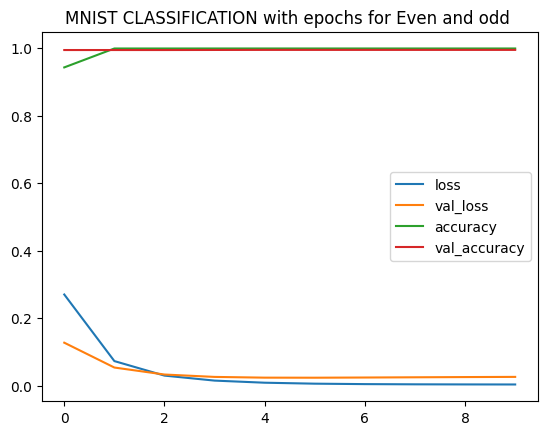

In [173]:
plt.title("MNIST CLASSIFICATION with epochs for Even and odd ")
plt.plot(history_tl.history['loss'],label='loss')
plt.plot(history_tl.history['val_loss'],label='val_loss')
plt.plot(history_tl.history['accuracy'],label='accuracy')
plt.plot(history_tl.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [174]:
y_predict_cnn_tl = tranf_cnn_model.predict(X_test_CNN)
y_predict_cnn_tl_one = np.argmax(y_predict_cnn_tl,axis=1)

313/313 [==============================] - 1s 3ms/step


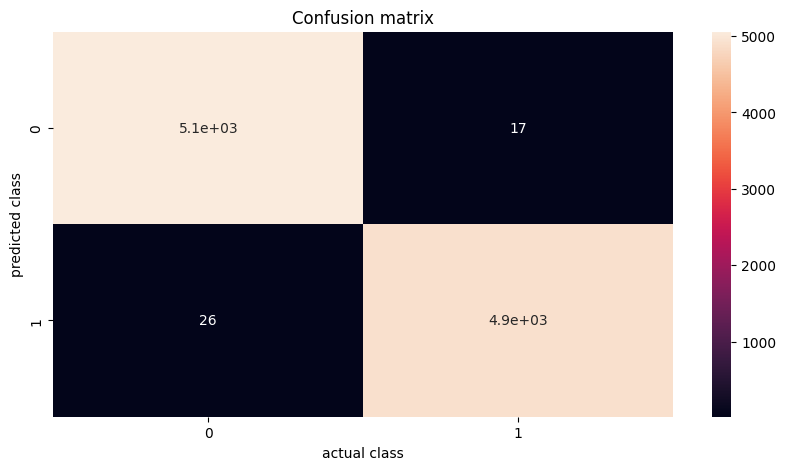

In [176]:
cm_tl = confusion_matrix(y_4_transf_test,y_predict_cnn_tl_one)
plt.figure(figsize=(10,5))
plt.title("Confusion matrix")
sns.heatmap(cm_tl,annot=True,)
plt.xlabel("actual class")
plt.ylabel("predicted class")
plt.show()